# Earthquakes in Indonesia - Part 2

Anggota Kelompok:  
1. I Putu Natha Kusuma (235150201111023)  
2. Qori Imaduddin (235150200111023)  
3. Yoga Raditya Nala (235150201111020)

Implementasi materi kuliah variabel acak kontinu, distribusi peluang kontinu, sampling dan distribusi sampling, penaksiran parameter, dan uji hipotesis.

## Setup

In [1]:
#import dependencies
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/nathakusuma/stp-data-gempa/main/katalog_gempa.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


Dataset ini mencatat informasi tentang gempa bumi. Berikut beberapa kolom yang tersedia:

- `tgl`: Tanggal gempa
- `ot`: Waktu kejadian
- `lat`: Lintang
- `lon`: Bujur
- `depth`: Kedalaman
- `mag`: Magnitudo
- `remark`: Keterangan lokasi
- `strike1`, `dip1`, `rake1`, `strike2`, `dip2`, `rake2`: Informasi tentang mekanisme sumber gempa (banyak nilai NaN).

## Variabel Acak Kontinu

Mari kita terapkan beberapa konsep dari variabel acak kontinu pada data ini, khususnya pada magnitudo (`mag`) dan kedalaman (`depth`) gempa.

### Distribusi Probabilitas dan Fungsi Kerapatan Probabilitas (PDF)

Untuk memahami distribusi magnitudo dan kedalaman gempa, kita akan memvisualisasikan distribusi probabilitasnya menggunakan histogram dan kemudian memperkirakan PDF-nya.


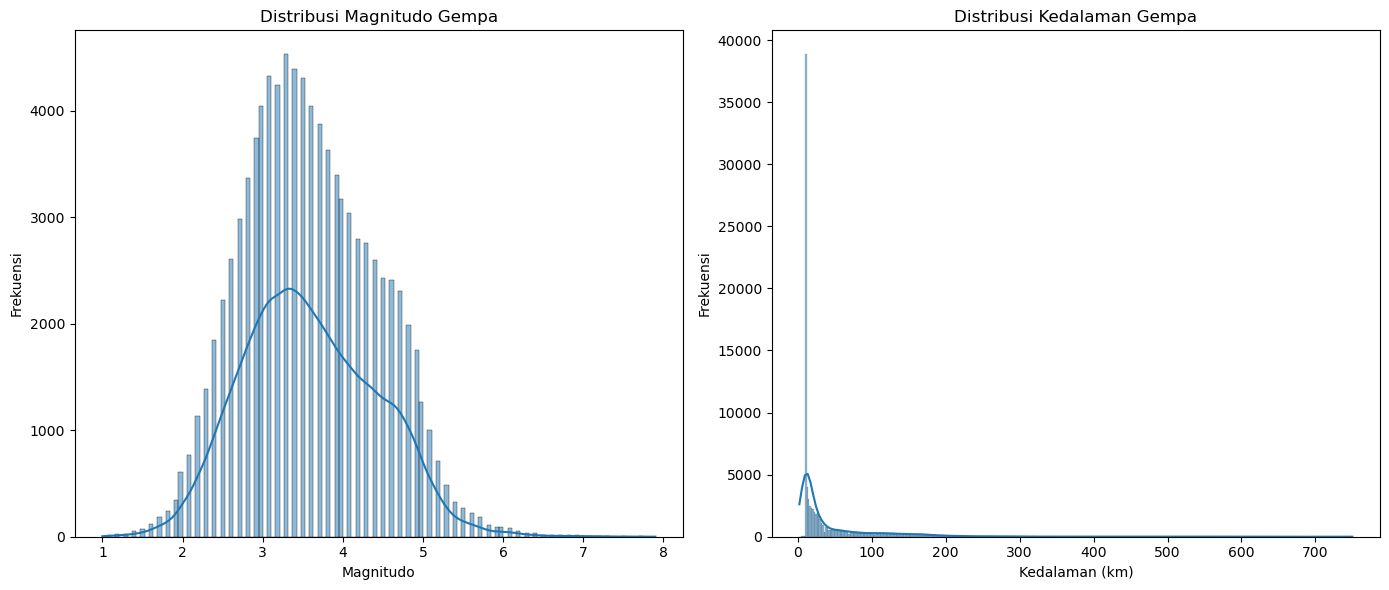

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram dan PDF untuk magnitudo gempa
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['mag'], kde=True)
plt.title('Distribusi Magnitudo Gempa')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')

# Plot histogram dan PDF untuk kedalaman gempa
plt.subplot(1, 2, 2)
sns.histplot(data['depth'], kde=True)
plt.title('Distribusi Kedalaman Gempa')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

1. **Distribusi Magnitudo Gempa**
   - Histogram dan kurva PDF menunjukkan distribusi magnitudo gempa dalam data. Terlihat sebagian besar gempa memiliki magnitudo antara 3.0 dan 4.0.

2. **Distribusi Kedalaman Gempa**
   - Histogram dan kurva PDF untuk kedalaman gempa menunjukkan bahwa banyak gempa terjadi pada kedalaman sekitar 10 km, tetapi ada juga gempa pada berbagai kedalaman lainnya.


### Perhitungan Probabilitas dalam Interval Tertentu

Misalkan kita ingin menghitung probabilitas untuk menemukan gempa dengan magnitudo antara 3.0 dan 4.0, serta kedalaman antara 0 dan 50 km. Ini bisa dilakukan dengan menghitung proporsi data yang memenuhi kondisi tersebut.


In [4]:
# Probabilitas magnitudo antara 4.0 dan 5.0
P_mag_3_4 = ((data['mag'] >= 3.0) & (data['mag'] <= 4.0)).mean()

# Probabilitas kedalaman antara 0 dan 50 km
P_depth_0_50 = ((data['depth'] >= 0) & (data['depth'] <= 50)).mean()

P_mag_3_4, P_depth_0_50

(0.4731340230602775, 0.7400282063152002)

- **Probabilitas magnitudo antara 3.0 dan 4.0:**
  - Probabilitas untuk menemukan gempa dengan magnitudo antara 4.0 dan 5.0 adalah sekitar $(0.4731)$.

- **Probabilitas kedalaman antara 0 dan 50 km:**
  - Probabilitas untuk menemukan gempa dengan kedalaman antara 0 dan 50 km adalah sekitar $(0.7400)$.

### Distribusi Peluang Gabungan

Selanjutnya, kita dapat melihat distribusi peluang gabungan untuk magnitudo dan kedalaman gempa. Ini melibatkan melihat bagaimana dua variabel ini berinteraksi satu sama lain.


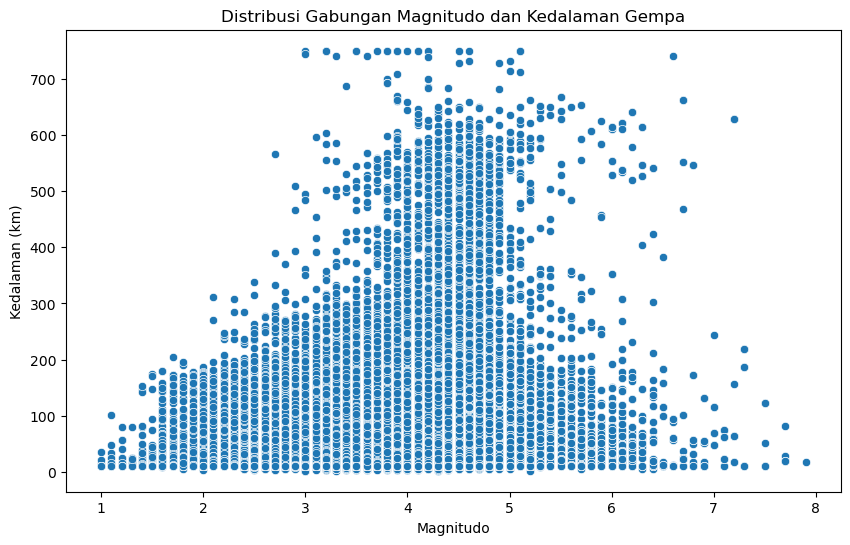

In [5]:
# Scatter plot untuk melihat distribusi gabungan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['mag'], y=data['depth'])
plt.title('Distribusi Gabungan Magnitudo dan Kedalaman Gempa')
plt.xlabel('Magnitudo')
plt.ylabel('Kedalaman (km)')
plt.show()

- **Scatter Plot Magnitudo vs. Kedalaman**
  - Scatter plot menunjukkan hubungan antara magnitudo dan kedalaman gempa. Tidak terlihat adanya pola yang jelas antara kedua variabel ini, yang menunjukkan bahwa magnitudo gempa tidak secara langsung terkait dengan kedalaman gempa.


## Distribusi Peluang Kontinu

Untuk aplikasi materi ini, kita bisa menggunakan data dari kolom `mag` (magnitudo) gempa.

### Distribusi Uniform Kontinu

**Langkah-langkah Analisis**:
- Tentukan interval distribusi uniform dan hitung fungsi rapat probabilitasnya.
- Contoh: Jika kita anggap magnitudo gempa tersebar merata antara nilai minimum dan maksimum.

**Interval dan Fungsi Rapat Probabilitas**:
- Interval [A, B] di mana A adalah magnitudo minimum dan B adalah magnitudo maksimum.
- Fungsi rapat probabilitas $( f(x) = \frac{1}{B-A} )$ untuk $( A \leq x \leq B )$.

**Menghitung Parameter dan Fungsi Distribusi**:

In [6]:
# Menghitung interval [A, B]
A = data['mag'].min()
B = data['mag'].max()

# Fungsi rapat probabilitas
f_uniform = 1 / (B - A)

A, B, f_uniform

(1.0, 7.9, 0.14492753623188406)

**Hasil Analisis**
- **Interval [A, B]**:
  - A (min): 1.0
  - B (max): 7.9
- **Fungsi Rapat Probabilitas (f_uniform)**:
  - $( f(x) = \frac{1}{B - A} = 0.1449 )$

### Distribusi Normal

**Langkah-langkah Analisis**:
   - Hitung parameter mean (μ) dan standar deviasi (σ) dari data magnitudo gempa.
   - Gunakan distribusi normal untuk menghitung peluang magnitudo gempa dalam rentang tertentu.

**Hitung Mean (μ) dan Standar Deviasi (σ)**:
   - Mean (μ) = rata-rata magnitudo gempa.
   - Standar deviasi (σ) = standar deviasi magnitudo gempa.

**Peluang dalam Rentang Tertentu**:
   - Gunakan fungsi distribusi normal untuk menghitung peluang magnitudo gempa dalam rentang tertentu, misalnya antara 4 dan 5.

**Menghitung Parameter dan Fungsi Distribusi**:

In [7]:
# Menghitung mean (μ) dan standar deviasi (σ)
mean_mag = data['mag'].mean()
std_mag = data['mag'].std()

mean_mag, std_mag

(3.592788011239463, 0.834042236781118)

**Menghitung Peluang dalam Rentang Tertentu**:

In [8]:
from scipy.stats import norm

# Rentang magnitudo
x1 = 4
x2 = 5

# Menghitung peluang P(x1 < X < x2)
p = norm.cdf(x2, mean_mag, std_mag) - norm.cdf(x1, mean_mag, std_mag)

p

0.2669096486986331

**Hasil Analisis**
- **Mean (μ)**: 3.59
- **Standar Deviasi (σ)**: 0.83
- **Peluang P(4 < X < 5)**: 0.267

Ini berarti bahwa peluang magnitudo gempa terjadi antara 4 dan 5 adalah sekitar 26.7% berdasarkan distribusi normal. Selain itu, untuk distribusi uniform kontinu, fungsi rapat probabilitasnya adalah 0.1449 dalam interval 1.0 hingga 7.9.

## Sampling dan Distribusi Sampling

Sampel merupakan sekumpulan data yang diambil atau diseleksi dari suatu populasi yg pada dasarnya adalah bagian dari populasi. Terdapat dua jenis metode sampling, yaitu sampling probabilitas dan sampling non probabilitas. Beberapa metode dalam pengambilan sampel/sampling probabilitas, yaitu sampel acak, sampel berstrata, sampel klaster, dan sampel sistematis.

Sementara itu pada sampling non probabilitas, terdapat sampel haphazard, sampel snowball, dan sampel purposive. Pada notebook ini, penulis memilih untuk menggunakan sampel probabilitas, karena sudah disediakan oleh library pandas.

### Sampel Acak

In [9]:
acak_df = data.sample(n=10)
acak_df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
89428,2022/11/02,10:45:41.469,-8.25,114.94,21,2.4,Bali Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
64326,2020/04/24,08:20:50.574,4.26,126.60,21,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
84658,2022/04/30,12:58:26.354,-6.68,120.68,10,3.9,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
57667,2019/09/18,18:46:10.375,-2.84,128.04,15,2.9,Ceram Sea,NaN,NaN,NaN,NaN,NaN,NaN
77787,2021/10/04,10:10:01.535,-0.03,123.65,134,4.2,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN
75690,2021/07/13,17:44:10.576,-3.37,140.79,72,2.5,Irian Jaya - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
75767,2021/07/15,20:37:36.897,2.44,128.91,10,3.6,Halmahera - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
23399,2015/11/22,07:20:45.312,-2.95,128.05,19,2.7,Ceram Sea,NaN,NaN,NaN,NaN,NaN,NaN
22268,2015/09/19,19:05:48.216,1.80,126.51,13,3.8,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
24049,2015/12/20,21:38:39.849,3.64,117.70,10,4.8,Borneo,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
acak_df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,10.000000,10.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,-1.198000,125.587000,32.500000,3.480000,NaN,NaN,NaN,NaN,NaN,NaN
std,4.308255,7.145544,40.158713,0.809389,NaN,NaN,NaN,NaN,NaN,NaN
min,-8.250000,114.940000,10.000000,2.400000,NaN,NaN,NaN,NaN,NaN,NaN
25%,-3.265000,121.422500,10.750000,2.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,-1.435000,126.555000,17.000000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.280000,128.047500,21.000000,3.975000,NaN,NaN,NaN,NaN,NaN,NaN
max,4.260000,140.790000,134.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN


Kode di atas akan menghasilkan 10 sampel data gempa secara acak tanpa ketentuan khusus. Setiap row atau data pada kumpulan data tersebut memiliki peluang yang sama untuk terpilih sebagai sampel.

### Sampel Strata

In [11]:
df = pd.DataFrame(data)

# Define magnitude bins (e.g., 4.0-4.9, 5.0-5.9, 6.0-6.9, etc.)
bins = [4, 5, 6, 7, 8]
labels = ['4.0-4.9', '5.0-5.9', '6.0-6.9', '7.0-7.9']

# Create a new column 'magnitude_level' to indicate the stratum
df['magnitude_level'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)

# Perform stratified sampling
def stratified_sample(df, strata_col, n_samples_per_stratum):
    # Create an empty DataFrame to store the sampled data
    sampled_df = pd.DataFrame()
    # Iterate over each stratum
    for stratum in df[strata_col].unique():
        stratum_df = df[df[strata_col] == stratum]
        sample_size = min(len(stratum_df), n_samples_per_stratum)
        sampled_stratum_df = stratum_df.sample(sample_size)
        sampled_df = pd.concat([sampled_df, sampled_stratum_df])
    return sampled_df

# Number of samples per stratum
n_samples = 2

# Get the stratified sample
stratified_df = stratified_sample(df, 'magnitude_level', n_samples)

# Print the sampled data
stratified_df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,magnitude_level
67864,2020/09/26,13:25:54.573,-0.35,123.28,76,4.2,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,4.0-4.9
85476,2022/06/02,20:19:10.945,-3.41,128.79,10,4.0,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,4.0-4.9
4812,2010/03/03,19:34:52.717,-7.31,104.63,26,5.3,Southwest of Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,5.0-5.9
69991,2020/12/25,02:00:33.094,5.22,126.24,94,5.2,Mindanao - Philippines,NaN,NaN,NaN,NaN,NaN,NaN,5.0-5.9
74296,2021/06/03,10:09:59.613,0.41,126.23,36,6.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,6.0-6.9
75961,2021/07/26,12:09:07.077,-0.74,121.95,11,6.3,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,6.0-6.9
92088,2023/01/09,17:47:34.171,-7.38,130.18,122,7.5,Tanimbar Islands Reg. - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,7.0-7.9
31413,2017/04/28,20:23:17.828,5.45,125.00,10,7.1,Mindanao - Philippines,144.5,55.2,91.1,322.62,34.8,88.5,7.0-7.9


In [12]:
stratified_df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,8.000000,8.000000,8.000000,8.000000,1.0,1.0,1.0,1.00,1.0,1.0
mean,-1.013750,123.287500,48.125000,5.712500,144.5,55.2,91.1,322.62,34.8,88.5
std,4.914936,7.999853,43.524829,1.268787,NaN,NaN,NaN,NaN,NaN,NaN
min,-7.380000,104.630000,10.000000,4.000000,144.5,55.2,91.1,322.62,34.8,88.5
25%,-4.385000,122.947500,10.750000,4.950000,144.5,55.2,91.1,322.62,34.8,88.5
50%,-0.545000,125.615000,31.000000,5.700000,144.5,55.2,91.1,322.62,34.8,88.5
75%,1.612500,126.877500,80.500000,6.500000,144.5,55.2,91.1,322.62,34.8,88.5
max,5.450000,130.180000,122.000000,7.500000,144.5,55.2,91.1,322.62,34.8,88.5


Kode di atas dapat menghasilkan 8 sampel data menggunakan metode sampel strata (stratified sampling). Setiap data akan dikategorikan pada kategori tertentu. Pada data tersebut, penulis mengategorikan `magnitude` gempa berdasarkan levelnya. Setiap level akan diambil sebanyak 2 sampel acak, sehingga akan didapatkan 8 sampel acak dari semua level.

### Sampel Klaster

In [13]:
df = pd.DataFrame(data)

# Membuat kolom klaster (misalnya, setiap 10 baris menjadi satu klaster)
df['cluster'] = df.index // 5

# Menentukan jumlah klaster yang akan dipilih
n_clusters_to_sample = 2

# Memilih klaster secara acak
sampled_clusters = df['cluster'].unique()
sampled_clusters = np.random.choice(sampled_clusters, n_clusters_to_sample, replace=False)

# Mengambil semua elemen dari klaster yang dipilih
cluster_df = df[df['cluster'].isin(sampled_clusters)]
cluster_df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,cluster
29825,2017/01/26,06:13:06.511,-2.61,128.84,13,3.2,Ceram Sea,NaN,NaN,NaN,NaN,NaN,NaN,5965
29826,2017/01/26,04:51:20.091,-2.58,128.85,10,3.7,Ceram Sea,NaN,NaN,NaN,NaN,NaN,NaN,5965
29827,2017/01/26,04:39:59.537,-8.24,107.50,18,2.9,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,5965
29828,2017/01/26,04:04:59.021,-2.09,100.10,10,3.2,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,5965
29829,2017/01/27,22:23:54.516,-2.95,102.91,241,4.2,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,5965
50645,2019/02/02,22:41:28.555,-2.84,100.02,23,3.7,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,10129
50646,2019/02/02,22:15:21.280,-2.88,100.01,11,2.2,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,10129
50647,2019/02/02,22:12:54.723,-2.97,99.92,16,2.4,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,10129
50648,2019/02/02,22:04:38.054,5.17,97.62,18,3.9,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,10129
50649,2019/02/02,22:03:11.383,-2.88,99.95,18,2.1,Southern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,10129


In [14]:
cluster_df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2,cluster
count,10.000000,10.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
mean,-2.487000,106.572000,37.800000,3.150000,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
std,3.210905,12.030324,71.522801,0.738241,NaN,NaN,NaN,NaN,NaN,NaN,2194.620696
min,-8.240000,97.620000,10.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,5965.000000
25%,-2.932500,99.965000,11.500000,2.525000,NaN,NaN,NaN,NaN,NaN,NaN,5965.000000
50%,-2.860000,100.060000,17.000000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,-2.587500,106.352500,18.000000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,10129.000000
max,5.170000,128.850000,241.000000,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,10129.000000


Kode di atas mengambil sebanyak 10 sampel dari 2 kluster yang telah di acak sebelumnya. Mekanismenya adalah, dataframe akan dibagi menjadi beberapa kluster, dalam kode tersebut, setiap kluster akan memiliki 5 data. Setelah didapatkan kluster tersebut, akan dipilih secara acak 2 kluster yang akan dijadikan sampel. Pada hasil di atas, cluster sampel adalah cluster 2854 dan cluster 11100.

### Sampel Sistematis

In [15]:
# Menentukan ukuran interval
interval = 10000

# Menentukan titik awal secara acak
random_start = np.random.randint(0, interval)

# Mengambil sampel berdasarkan interval
sample_sistematis = df.iloc[random_start::interval]

sample_sistematis

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,cluster
8362,2011/04/01,07:22:28.268,-8.65,110.76,10,3.0,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,1672
18362,2014/08/17,12:08:20.252,-2.88,139.68,62,3.3,Near North Coast of Irian Jaya,NaN,NaN,NaN,NaN,NaN,NaN,3672
28362,2016/10/27,16:19:35.870,-9.89,125.09,17,3.7,Timor Region,NaN,NaN,NaN,NaN,NaN,NaN,5672
38362,2018/02/25,16:36:29.904,-6.99,112.40,750,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,7672
48362,2018/12/01,09:59:53.905,0.84,125.99,10,3.7,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,9672
58362,2019/10/05,11:21:38.784,-3.64,128.41,10,2.3,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,11672
68362,2020/10/20,19:02:00.509,-8.23,116.01,11,3.6,Sumbawa Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,13672
78362,2021/10/26,23:30:24.537,-2.57,139.54,29,3.3,Near North Coast of Irian Jaya,NaN,NaN,NaN,NaN,NaN,NaN,15672
88362,2022/09/29,19:05:15.355,-1.33,120.29,10,2.1,Sulawesi - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,17672


In [16]:
sample_sistematis.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2,cluster
count,9.000000,9.000000,9.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.000000
mean,-4.815556,124.241111,101.000000,3.188889,NaN,NaN,NaN,NaN,NaN,NaN,9672.000000
std,3.727345,10.600052,243.973872,0.611237,NaN,NaN,NaN,NaN,NaN,NaN,5477.225575
min,-9.890000,110.760000,10.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,1672.000000
25%,-8.230000,116.010000,10.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,5672.000000
50%,-3.640000,125.090000,11.000000,3.300000,NaN,NaN,NaN,NaN,NaN,NaN,9672.000000
75%,-2.570000,128.410000,29.000000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,13672.000000
max,0.840000,139.680000,750.000000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,17672.000000


Kode di atas menerapkan metode sampel sistematis. Pada dataframe yang sudah terurut, akan diambil secara acak titik mulai dari sampel dan interval sampel. Pada kode di atas, interval yang saya gunakan adalah sebanyak `10000`. Artinya, setelah ditentukan titik mulai secara acak, kode akan mengambil data pada titik tersebut, diikuti dengan data setelah interval tersebut. Hal tersebut dapat diperhatikan pada nomor data yang bertambah secara konstan.

## Penaksiran Parameter

Pendugaan / penaksiran parameter bertujuan untuk memperoleh informasi tentang suatu populasi berdasarkan informasi yang diperoleh dari sampel.

### Penaksiran Titik

Penaksiran Titik (Point Estimation):
*   Mengestimasi suatu parameter menggunakan satu bilangan saja dengan menghitung rata-rata (mean) magnitudo gempa dari sampel yang tersedia.

In [17]:
# Menghitung rata-rata magnitudo
df = pd.DataFrame(data).sample(n=10)
mean_mag = df['mag'].mean()
print(f"Rata-rata Magnitude: {mean_mag}")

Rata-rata Magnitude: 3.56


### Penaksiran Interval

Penaksiran Interval (Interval Estimation)
*   Mengestimasi parameter populasi dalam interval nilai tertentu untuk mengurangi kesalahan penaksiran dengan menghitung interval kepercayaan (confidence interval)
dengan tingkat kepercayaan tertentu (misalnya 95%).

#### Penaksiran Rata-Rata

Menggunakan distribusi t untuk menghitung interval kepercayaan karena ukuran sampel yang kecil ( $< 30$ )

In [18]:
import scipy.stats as stats

# Menghitung simpangan baku dan ukuran sampel
df = pd.DataFrame(data).sample(n=10)
mean_mag = df['mag'].mean()
std_mag = df['mag'].std()
n = len(df)

# Menghitung interval kepercayaan 95%
confidence_level = 0.95
alpha = 1 - confidence_level

# Nilai kritis t untuk ukuran sampel kecil
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Margin of error
margin_of_error = t_critical * (std_mag / (n**0.5))

# Interval kepercayaan
confidence_interval = (mean_mag - margin_of_error, mean_mag + margin_of_error)

print(f"Interval Kepercayaan (Confidence Level) 95%: {confidence_interval}")

Interval Kepercayaan (Confidence Level) 95%: (2.8257563321185417, 4.274243667881458)


Menggunakan distribusi normal untuk menghitung interval kepercayaan karena ukuran sampel yang besar ( $\geq 30$)

In [19]:
import scipy.stats as stats

# Menghitung simpangan baku dan ukuran sampel
df = pd.DataFrame(data).sample(n=100)
mean_mag = df['mag'].mean()
std_mag = df['mag'].std()
n = len(df)

# Menghitung interval kepercayaan 95%
confidence_level = 0.95
alpha = 1 - confidence_level

# Nilai kritis z untuk ukuran sampel besar
z_critical = stats.norm.ppf(1 - alpha/2)

# Margin of error
margin_of_error = z_critical * (std_mag / np.sqrt(n))

# Interval kepercayaan
confidence_interval = (mean_mag - margin_of_error, mean_mag + margin_of_error)

print(f"Interval Kepercayaan (Confidence Level) 95%: {confidence_interval}")

Interval Kepercayaan (Confidence Level) 95%: (3.4120809060213695, 3.72791909397863)


Dari hasil perhitungan diatas, didapatkan

*   Confidence Level 95% untuk rata-rata magnitudo gempa.

Karena interval kepercayaan untuk rata-rata magnitudo gempa tidak mencakup nilai nol, itu menunjukkan bahwa rata-rata magnitudo gempa yang diamati memiliki signifikansi statistik yang tinggi.

#### Penaksiran Selisih Rata-Rata

Menggunakan distribusi t untuk menghitung interval kepercayaan karena ukuran sampel yang kecil ( $< 30$ )

In [20]:
from scipy.stats import t

# Misalkan kita memiliki dua kelompok sampel tinggi badan
group1 = data[data['remark'] == 'Bali Region - Indonesia']['mag'].sample(n=10)
group2 = data[data['remark'] == 'Minahassa Peninsula - Sulawesi']['mag'].sample(n=10)

# Hitung rata-rata dan simpangan baku untuk kedua kelompok
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
std_dev_group1 = np.std(group1, ddof=1)
std_dev_group2 = np.std(group2, ddof=1)
n1 = len(group1)
n2 = len(group2)

# Hitung selisih rata-rata
mean_difference = mean_group1 - mean_group2

# Hitung standard error dari selisih rata-rata
standard_error = np.sqrt((std_dev_group1**2 / n1) + (std_dev_group2**2 / n2))

# Hitung interval kepercayaan untuk selisih rata-rata
t_critical = t.ppf(0.975, df=n1+n2-2)
margin_of_error = t_critical * standard_error
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

print("Interval kepercayaan untuk selisih rata-rata:", confidence_interval)

Interval kepercayaan untuk selisih rata-rata: (-0.6965481756158202, 0.5765481756158183)


Menggunakan distribusi normal untuk menghitung interval kepercayaan karena ukuran sampel yang besar ( $\geq 30$)

In [21]:
from scipy.stats import norm

# Misalkan kita memiliki dua kelompok sampel tinggi badan
group1 = data[data['remark'] == 'Bali Region - Indonesia']['mag'].sample(n=100)
group2 = data[data['remark'] == 'Minahassa Peninsula - Sulawesi']['mag'].sample(n=100)

# Hitung rata-rata dan simpangan baku untuk kedua kelompok
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
std_dev_group1 = np.std(group1, ddof=1)
std_dev_group2 = np.std(group2, ddof=1)
n1 = len(group1)
n2 = len(group2)

# Hitung selisih rata-rata
mean_difference = mean_group1 - mean_group2

# Hitung standard error dari selisih rata-rata
standard_error = np.sqrt((std_dev_group1**2 / n1) + (std_dev_group2**2 / n2))

# Hitung interval kepercayaan untuk selisih rata-rata
z_critical = norm.ppf(0.975)  # Nilai kritis z untuk tingkat kepercayaan 95%
margin_of_error = z_critical * standard_error
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

print("Interval kepercayaan untuk selisih rata-rata:", confidence_interval)

Interval kepercayaan untuk selisih rata-rata: (-0.5077025922258396, -0.12629740777416076)


Dari hasil perhitungan diatas, didapatkan

*   Confidence Level 95% untuk rata-rata magnitudo gempa.

Dari hasil output, dapat disimpulkan rata-rata magnitudo gempa yang terjadi di group1 diperkirakan lebih rendah daripada pada group2.

## Uji Hipotesis

Hipotesis merupakan pernyataan atau asumsi yang belum pasti kebenarannya. Uji hipotesis merupakan proses evaluasi hipotesis dgn mengumpulkan bukti berupa data-
data yg menjadi dasar keputusan penolakan atau penerimaan hipotesis.

### Pengujian Satu Arah

Dalam hipotesis, dinyatakan bahwa suatu variable mempengaruhi variable lain ke arah yg sama.  

$H_0: \mu < 2.0$  
$H_1: \mu > 2.0$

#### Uji t Satu Sampel

In [22]:
df = pd.DataFrame(data).sample(n=10)

# Nilai rata-rata yang dihipotesiskan
mu_0 = 2.0

# Menghitung statistik uji t
t_statistic, p_value = stats.ttest_1samp(df['mag'], mu_0)

# Karena ini adalah pengujian satu arah (lebih besar dari), kita harus menyesuaikan p-value
# Dengan membagi dua dan memeriksa tanda dari t_statistic
if t_statistic > 0:
    p_value_one_sided = p_value / 2
else:
    p_value_one_sided = 1 - (p_value / 2)

# Tentukan tingkat signifikansi
alpha = 0.05

# Ambil keputusan
if p_value_one_sided < alpha:
    print(f"Tolak H0: Rata-rata magnitudo lebih besar dari {mu_0}")
else:
    print(f"Terima H0: Rata-rata magnitudo tidak lebih besar dari lebih besar dari {mu_0}")

print(f"t-statistic: {t_statistic}, p-value (one-sided): {p_value_one_sided}")

Tolak H0: Rata-rata magnitudo lebih besar dari 2.0
t-statistic: 4.975093590259782, p-value (one-sided): 0.0003822772937286314


Pada uji t di atas, saya menggunakan sampel sebanyak 10 untuk kemudian dicari t statistic dan juga p value. Di sini saya menggunakan level of significance ($\alpha$) sebanyak 0.05. Pada kode tersebut, kita perlu menggunakan if statement untuk menentukan tail dari dari uji t.

#### Uji z Satu Sampel

In [23]:
import pandas as pd
import numpy as np
from scipy import stats

# DataFrame yang diambil sampelnya
df = pd.DataFrame(data).sample(n=100)

sample_mean = df['mag'].mean()
population_mean = 2.0  # Nilai rata-rata yang dihipotesiskan
sample_std = df['mag'].std()
n = df.size

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung nilai uji z
z = (sample_mean - population_mean) / (sample_std / (n**0.5))

# Menghitung p-value untuk satu arah (one-tailed test)
p_value = stats.norm.sf(z)  # sf: survival function, karena kita tertarik pada nilai yang lebih besar dari z

# Ambil keputusan
if p_value < alpha:
    print(f"Tolak H0: Rata-rata magnitudo lebih besar dari {population_mean}")
else:
    print(f"Terima H0: Rata-rata magnitudo tidak lebih besar dari lebih besar dari {population_mean}")

print(f"z-value: {z}, p-value: {p_value}")

Tolak H0: Rata-rata magnitudo lebih besar dari 2.0
z-value: 65.65963314572136, p-value: 0.0


Pada uji z di atas, saya menggunakan sampel sebanyak 100 untuk kemudian dicari t statistic dan juga p value. Dalam kode tersebut, saya juga menyertakan mean dan juga standard deviasi atau simpangan baku. Di sini saya menggunakan level of significance ($\alpha$) sebanyak 0.05. Pada kode tersebut, kita perlu melakukan `stats.norm.sf`, karena kita perlu mencari untuk nilai yang lebih besar dari z.

Pada uji t dan z satu arah di atas, kita menentukan hipotesis bahwa rata-rata magnitudo kurang dari 2.0. Selanjutnya, diperoleh bahwa p-value bernilai 0, akibatnya ketika p-value $< \alpha$, maka akan menolak $H_0$, sehingga rata-rata magnitudo lebih besar dari 2.0.

### Pengujian Dua Arah

Dalam hipotesis, dinyatakan bahwa suatu variable mempengaruhi variable lain namun arahnya tidak diketahui.

$H_0: \mu = 5.0$  
$H_1: \mu \neq 5.0$

$\mu$ = Rata-rata magnitudo

#### Uji t Satu Sampel

In [24]:
df = pd.DataFrame(data).sample(n=10)

# Nilai rata-rata yang dihipotesiskan
mu_0 = 5.0

# Menghitung statistik uji t
t_statistic, p_value = stats.ttest_1samp(df['mag'], mu_0)

# Tentukan tingkat signifikansi
alpha = 0.05

# Ambil keputusan
if p_value < alpha:
    print(f"Tolak H0: Rata-rata magnitudo berbeda secara signifikan dari {mu_0}")
else:
    print(f"Terima H0: Rata-rata magnitudo tidak berbeda secara signifikan dari {mu_0}")

print(f"t-statistic: {t_statistic}, p-value: {p_value}")

Tolak H0: Rata-rata magnitudo berbeda secara signifikan dari 5.0
t-statistic: -16.892468273982637, p-value: 4.003604536183594e-08


Pada uji t di atas, saya menggunakan sampel sebanyak 10 untuk kemudian dicari t statistic dan juga p value. Di sini saya menggunakan level of significance ($\alpha$) sebanyak 0.05.

#### Uji z Satu Sampel

In [25]:
df = pd.DataFrame(data).sample(n=100)

sample_mean = df['mag'].mean()
population_mean = 5.0  # Nilai rata-rata yang dihipotesiskan
sample_std = df['mag'].std()
n = df.size

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung nilai uji z
z = (sample_mean - population_mean) / (sample_std / (n**0.5))

# Menghitung p-value
p_value = stats.norm.sf(abs(z)) * 2

# Ambil keputusan
if p_value < alpha:
    print(f"Tolak H0: Rata-rata magnitudo berbeda secara signifikan dari {population_mean}")
else:
    print(f"Terima H0: Rata-rata magnitudo tidak berbeda secara signifikan dari {population_mean}")

print(f"z-value: {z}, p-value: {p_value}")

Tolak H0: Rata-rata magnitudo berbeda secara signifikan dari 5.0
z-value: -47.00480910367386, p-value: 0.0


Pada uji z di atas, saya menggunakan sampel sebanyak 100 untuk kemudian dicari t statistic dan juga p value. Dalam kode tersebut, saya juga menyertakan mean dan juga standard deviasi atau simpangan baku. Di sini saya menggunakan level of significance ($\alpha$) sebanyak 0.05.

Pada pengujian hipotesis dua arah di atas, kita menentukan hipotesis bahwa rata-rata magnitudo sama dengan 5.0. Selanjutnya, diperoleh bahwa p-value bernilai 0, akibatnya ketika p-value $< \alpha$, maka akan menolak $H_0$.

### Pengujian Dua Sampel

$H_0: \mu_1 = \mu_2$  
$H_1: \mu_1 \neq \mu_2$

#### Uji t Dua Sampel

In [26]:
df = pd.DataFrame(data)

# Memisahkan data berdasarkan kolom 'remark'
group1 = df[df['remark'] == 'Southern Sumatra - Indonesia']['mag'].sample(n=10)
group2 = df[df['remark'] == 'Sulawesi - Indonesia']['mag'].sample(n=10)

# Menghitung statistik deskriptif
print("Statistik Deskriptif Group 1 (Southern Sumatra - Indonesia):")
print(group1.describe())

print("\nStatistik Deskriptif Group 2 (Sulawesi - Indonesia):")
print(group2.describe())

# Menghitung varians dari kedua kelompok
var_group1 = group1.var()
var_group2 = group2.var()
print(f"\nVarians Group 1: {var_group1}")
print(f"Varians Group 2: {var_group2}")

# Menghitung statistik uji t dua sampel
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

# Tentukan tingkat signifikansi
alpha = 0.05

# Ambil keputusan
if p_value < alpha:
    print("Tolak H0: Rata-rata magnitudo berbeda secara signifikan antara kedua kelompok")
else:
    print("Terima H0: Tidak ada bukti yang cukup untuk mengatakan rata-rata magnitudo berbeda antara kedua kelompok")

print(f"\nt-statistic: {t_statistic}, p-value: {p_value}")


Statistik Deskriptif Group 1 (Southern Sumatra - Indonesia):
count    10.000000
mean      3.930000
std       0.869291
min       2.700000
25%       3.400000
50%       3.700000
75%       4.450000
max       5.600000
Name: mag, dtype: float64

Statistik Deskriptif Group 2 (Sulawesi - Indonesia):
count    10.000000
mean      3.410000
std       1.198564
min       2.500000
25%       2.800000
50%       3.000000
75%       3.625000
max       6.600000
Name: mag, dtype: float64

Varians Group 1: 0.7556666666666664
Varians Group 2: 1.4365555555555551
Terima H0: Tidak ada bukti yang cukup untuk mengatakan rata-rata magnitudo berbeda antara kedua kelompok

t-statistic: 1.110608660399096, p-value: 0.28273968844300823


Pada kode di atas, saya mengambil data dengan `remark` berupa `Southern Sumatra - Indonesia` dan `Sulawesi - Indonesia` dengan masing-masing sebanyak 10 sampel. Di sini saya menggunakan level of significance ($\alpha$) sebanyak 0.05 untuk bisa menentukan uji t.

#### Uji z Dua Sampel

In [27]:
# Memisahkan data berdasarkan kolom 'remark'
group1 = df[df['remark'] == 'Southern Sumatra - Indonesia']['mag'].sample(n=100)
group2 = df[df['remark'] == 'Sulawesi - Indonesia']['mag'].sample(n=100)

group1_mean = group1.mean()
group2_mean = group2.mean()
group1_std = group1.std()
group2_std = group2.std()
n1 = group1.size
n2 = group2.size

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung nilai uji z
z = (group1_mean - group2_mean) / ((group1_std**2 / n1) + (group2_std**2 / n2))**0.5

# Menghitung p-value
p_value = stats.norm.sf(abs(z)) * 2

# Ambil keputusan
if p_value < alpha:
    print("Tolak H0: Rata-rata magnitudo berbeda secara signifikan antara kedua kelompok")
else:
    print("Terima H0: Tidak ada bukti yang cukup untuk mengatakan rata-rata magnitudo berbeda antara kedua kelompok")

print(f"z-value: {z}, p-value: {p_value}")

Tolak H0: Rata-rata magnitudo berbeda secara signifikan antara kedua kelompok
z-value: 3.1311077624825674, p-value: 0.001741482452008635


Pada kode di atas, saya mengambil data dengan `remark` berupa `Southern Sumatra - Indonesia` dan `Sulawesi - Indonesia` dengan masing-masing sebanyak 100 sampel. Di sini saya menggunakan level of significance ($\alpha$) sebanyak 0.05 untuk bisa menentukan uji z. Pada kode tersebut, saya juga menyertakan m

Pada pengujian hipotesis dua sampel di atas, kita menentukan hipotesis bahwa rata-rata magnitudo antara dua sampel yang telah ditentukan adalah sama. Dalam kode tersebut, kita memilih sampel dikelompokkan berdasarkan `remark` dan akan diambil sebanyak 10 data sebagai sampel secara acak untuk uji t, dan pada uji z sebanyak 100. Selanjutnya, diperoleh bahwa p-value bernilai sangat kecil, akibatnya ketika p-value $< \alpha$, maka akan menolak $H_0$.

### Pengujian Chi-Square

$H_{0}$ : Terdapat perbedaan signifikan dalam distribusi dalam distribusi magnitudo gempa \\
$H_{1}$ : Tidak terdapat perbedaan signifikan dalam distribusi dalam distribusi magnitudo gempa

Mengelompokkan magnitudo menjadi tiga kategori:

*   Rendah ($< 4.0$)
*   Sedang ($4.0 - 6.0$)
*   Tinggi ($> 6.0$)

Hitung frekuensi untuk masing-masing kategori magnitudo

In [28]:
df = pd.DataFrame(data).sample(n=100)

# Define magnitude categories
bins = [0, 4.0, 6.0, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi']

# Create a new column for magnitude category
df['Mag_Category'] = pd.cut(df['mag'], bins=bins, labels=labels)

# Create a contingency table
contingency_table = pd.crosstab(df['Mag_Category'], columns='count')
print(contingency_table)

col_0         count
Mag_Category       
Rendah           77
Sedang           21
Tinggi            2


In [29]:
from scipy.stats import chisquare

# Observed frequencies
observed_frequencies = contingency_table['count'].values

# Expected frequencies (assuming equal distribution)
expected_frequencies = [sum(observed_frequencies) / len(observed_frequencies)] * len(observed_frequencies)

# Perform Chi-Square test
chi2_stat, p_val = chisquare(observed_frequencies, f_exp=expected_frequencies)
print(f'Chi-Square Stat: {chi2_stat}, p-value: {p_val}')

Chi-Square Stat: 91.22, p-value: 1.5553519584834164e-20


In [30]:
alpha = 0.05
if p_val < alpha:
    print("Tolak H0: Terdapat perbedaan signifikan dalam distribusi magnitudo gempa.")
else:
    print("Terima H0: Tidak terdapat perbedaan signifikan dalam distribusi magnitudo gempa.")

Tolak H0: Terdapat perbedaan signifikan dalam distribusi magnitudo gempa.


Berdasarkan output dari kode, didapatkan nilai dari chi-square dan p_val, karena nilai p_val lebih kecil dari alpha dapat disimpulkan "Terdapat perbedaan signifikan dalam distribusi magnitudo gempa" (Tolak H0) dan terdapat cukup bukti statistik untuk menyimpulkan bahwa terdapat perbedaan signifikan dalam distribusi magnitudo gempa.